In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_labeled = pd.read_csv("labeled_data.csv").drop("Unnamed: 0", axis=1)
matrix = pd.read_csv("data/matrix_data.csv").drop("Unnamed: 0", axis=1)
df_labeled

,smiles,logP,qed,SAS,label
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1,5.05060,0.702012,2.084095,3
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1,3.11370,0.928975,3.432004,1
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,4.96778,0.599682,2.470633,0
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,4.00022,0.690944,2.822753,1
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,3.60956,0.789027,4.035182,3
...,...,...,...,...,...
249450,CC1(C)CC[C@H](CNC(=O)Cn2ncc3ccccc3c2=O)c2ccccc21,3.36790,0.745901,2.900726,1
249451,Cn1ccnc1C(=O)c1ccc(NC(=O)C2CCN(C(=O)C(C)(C)C)C...,2.87430,0.799426,2.326627,1
249452,Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1,2.90054,0.878086,1.840642,3
249453,Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1,2.55624,0.852917,2.024638,3


In [64]:
import numpy as np
from scipy.signal import find_peaks

# Example data
data = np.array(df_labeled["qed"].values)# Calculate the histogram
hist, bin_edges = np.histogram(data, bins=125, density=True)
# Find local minima by inverting the data
inverted_data = -hist
valleys, _ = find_peaks(inverted_data)


In [66]:
np.histogram(data, bins=125, density=True)

(array([1.19868397e-03, 5.99341984e-04, 1.19868397e-03, 0.00000000e+00,
        2.99670992e-03, 3.59605190e-03, 5.39407785e-03, 8.39078777e-03,
        5.99341984e-03, 5.39407785e-03, 7.79144579e-03, 1.61822336e-02,
        1.37848656e-02, 1.55828916e-02, 1.97782855e-02, 1.97782855e-02,
        2.09769694e-02, 2.75697312e-02, 3.05664412e-02, 3.11657831e-02,
        4.73480167e-02, 4.31526228e-02, 5.03447266e-02, 5.81361724e-02,
        7.67157739e-02, 7.91131418e-02, 8.87026136e-02, 9.10999815e-02,
        1.19868397e-01, 1.38447998e-01, 1.19868397e-01, 1.42643392e-01,
        1.57027600e-01, 1.88193383e-01, 2.10369036e-01, 2.18160482e-01,
        2.50524949e-01, 2.72101261e-01, 2.69104551e-01, 2.87684152e-01,
        2.94276914e-01, 3.39826905e-01, 3.35631511e-01, 3.47019009e-01,
        3.54810454e-01, 3.79383476e-01, 4.06953207e-01, 4.48307804e-01,
        4.37519648e-01, 4.99251872e-01, 5.41205811e-01, 5.96944616e-01,
        6.12527507e-01, 6.65269602e-01, 6.98832753e-01, 7.371906

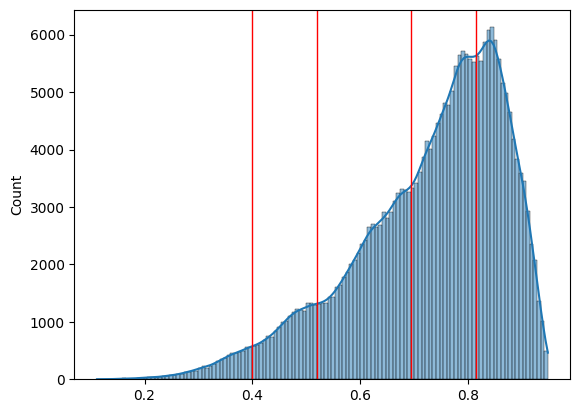

In [75]:
import seaborn as sns
# Create the histogram with KDE using Seaborn
sns.histplot(data, bins=125, kde=True)
for i in bin_edges[valleys[[7,10,14,17]]+1]:
    plt.axvline(x=i, color='red', linestyle='-', linewidth=1)

In [97]:
edge_list = bin_edges[valleys[[7,10,14,17]]+1]
edge_list

array([0.39941986, 0.51981407, 0.69371681, 0.81411102])

In [101]:
limit = []
for i in range(len(edge_list)):
    lower_limit = edge_list[i-1] if i != 0 else 0
    upper_limit = 1 if i == len(edge_list) else edge_list[i] 
    limit.append((lower_limit,upper_limit))
limit.append((limit[-1][1],1))
limit

[(0, 0.399419858728032),
 (0.399419858728032, 0.519814065862464),
 (0.519814065862464, 0.693716809501088),
 (0.693716809501088, 0.81411101663552),
 (0.81411101663552, 1)]

In [105]:
for lower_limit, upper_limit in limit:
    print(df_labeled[(df_labeled['qed'] >= lower_limit) & (df_labeled['qed'] < upper_limit)].shape)

(6868, 5)
(17544, 5)
(60325, 5)
(83895, 5)
(80823, 5)


In [84]:
df_labeled[(df_labeled['qed'] >= edge_list[0]) & (df_labeled['qed'] < edge_list[1])]

,smiles,logP,qed,SAS,label
8,Cc1c(/C=N/c2cc(Br)ccn2)c(O)n2c(nc3ccccc32)c1C#N,4.28130,0.483079,3.073935,2
46,COC(=O)[C@](NC(=O)c1cccc(Cl)c1)(Nc1ccc(Br)c[nH...,3.19010,0.515070,3.788625,3
58,Cc1occc1C(=O)/C(C#N)=C\c1cccc(C(F)(F)F)c1,4.39670,0.459245,2.477264,2
64,C=CCn1c(S[C@H](C)C(=O)N2CCC(C)CC2)nnc1-c1ccc(C...,4.52360,0.501178,2.745497,1
65,CCO[C@H]1C(=O)O[C@H]([C@@H](O)CO)C1=O,-1.76080,0.441574,4.085911,3
...,...,...,...,...,...
249378,COc1ccc(-c2noc(C[NH+]3CCN(Cn4c(=O)n(C)c5ccccc5...,0.75680,0.489642,3.313877,1
249380,Cc1ccc(CNC(=O)c2cc3cc(S(=O)(=O)N(C)C)ccc3n2Cc2...,4.17832,0.431321,2.157570,1
249405,O=C(CCc1c[nH]c2ccccc12)Nc1ccc(N2CCc3sccc3C2)nc1,4.75840,0.483660,2.383562,1
249430,CCOc1ccc2nc(N(C[C@@H]3CCCO3)C(=O)c3ccccc3S(C)(...,3.92430,0.513388,2.876072,0


In [6]:
cluster_center = pd.read_csv("data\clustercenter.csv")
cluster_center

,Br,C,Cl,F,H,I,N,O,P,S,...,sulfoxide,azido,nitroso,phospate,phospite,isothio,thioamide,nitro2,aromatic,cycle
0,2,26,2,1,21,1,0,8,0,0,...,0,0,0,0,0,0,0,0,3,2
1,1,20,1,3,45,3,5,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,4,1,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,8,0,1,16,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
matrix["label"] = df_labeled['label']
matrix

,Br,C,Cl,F,H,I,N,O,P,S,...,azido,nitroso,phospate,phospite,isothio,thioamide,nitro2,aromatic,cycle,label
0,0,20,0,1,20,0,1,2,0,0,...,0,0,0,0,0,0,0,3,0,3
1,0,16,0,0,24,0,5,0,0,0,...,0,0,0,0,0,0,0,1,2,1
2,0,25,0,0,22,0,2,2,0,0,...,0,0,0,0,0,0,0,3,1,0
3,0,24,0,0,32,0,3,3,0,0,...,0,0,0,0,0,0,0,1,3,1
4,0,20,1,0,18,0,4,2,0,1,...,0,0,0,0,0,0,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249450,0,23,0,0,26,0,3,2,0,0,...,0,0,0,0,0,0,0,2,2,1
249451,0,22,0,0,29,0,4,3,0,0,...,0,0,0,0,0,0,0,1,2,1
249452,0,18,0,0,20,0,2,2,0,0,...,0,0,0,0,0,0,0,2,0,3
249453,0,18,0,0,22,0,3,3,0,0,...,0,0,0,0,0,0,0,1,2,3


### Analysis for label 0

In [39]:
# filter the data
label = 0
new_matrix = matrix[matrix['label'] == label]
new_df_labeled = df_labeled[df_labeled['label'] == label]
new_matrix.shape, new_df_labeled.shape

((10463, 45), (10463, 5))

(array([1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 1.000e+01, 2.000e+00, 1.300e+01, 1.900e+01,
        1.600e+01, 1.800e+01, 2.000e+01, 3.200e+01, 3.500e+01, 3.900e+01,
        5.500e+01, 6.200e+01, 6.700e+01, 6.700e+01, 8.400e+01, 8.700e+01,
        8.800e+01, 1.280e+02, 1.660e+02, 2.080e+02, 2.290e+02, 2.530e+02,
        2.170e+02, 2.630e+02, 2.440e+02, 2.720e+02, 2.460e+02, 2.400e+02,
        2.860e+02, 3.490e+02, 3.680e+02, 4.690e+02, 5.640e+02, 6.490e+02,
        6.830e+02, 7.500e+02, 7.660e+02, 7.130e+02, 8.040e+02, 8.430e+02,
        7.900e+02, 7.620e+02, 7.800e+02, 8.340e+02, 9.450e+02, 1.011e+03,
        1.176e+03, 1.311e+03, 1.496e+03, 1.613e+03, 1.790e+03, 1.956e+03,
        2.177e+03, 2.223e+03, 2.120e+03, 2.358e+03, 2.334e+03, 2.540e+03,
        2.525e+03, 2.694e+03, 2.479e+03, 2.588e+03, 2.725e+03, 2.989e+03,
        3.303e+03, 3.371e+03, 3.572e+03, 3.925e+03, 4.178e+03, 4.296e+03,
        4.507e+03, 5.017e+03, 5.394e+0

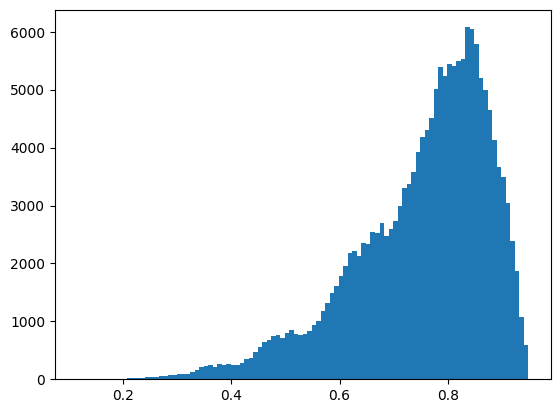

In [51]:
plt.hist(new_df_labeled["qed"], bins=100)

(array([1.000e+00, 2.000e+00, 3.000e+00, 1.300e+01, 2.600e+01, 6.900e+01,
        1.420e+02, 2.720e+02, 5.150e+02, 7.830e+02, 1.280e+03, 1.869e+03,
        2.552e+03, 3.257e+03, 4.081e+03, 4.560e+03, 4.948e+03, 5.373e+03,
        5.348e+03, 5.353e+03, 5.353e+03, 5.312e+03, 5.482e+03, 5.563e+03,
        5.576e+03, 5.701e+03, 5.760e+03, 5.654e+03, 5.723e+03, 5.433e+03,
        5.091e+03, 4.829e+03, 4.548e+03, 4.277e+03, 3.998e+03, 3.644e+03,
        3.301e+03, 3.023e+03, 2.855e+03, 2.627e+03, 2.523e+03, 2.437e+03,
        2.358e+03, 2.196e+03, 2.207e+03, 2.111e+03, 1.981e+03, 1.949e+03,
        1.754e+03, 1.769e+03, 1.667e+03, 1.519e+03, 1.408e+03, 1.344e+03,
        1.193e+03, 1.064e+03, 9.670e+02, 8.710e+02, 7.760e+02, 6.940e+02,
        6.270e+02, 5.920e+02, 5.190e+02, 4.440e+02, 3.860e+02, 3.480e+02,
        3.020e+02, 2.670e+02, 2.460e+02, 1.940e+02, 1.860e+02, 1.560e+02,
        1.380e+02, 1.140e+02, 9.500e+01, 1.070e+02, 8.700e+01, 6.900e+01,
        7.200e+01, 7.500e+01, 5.300e+0

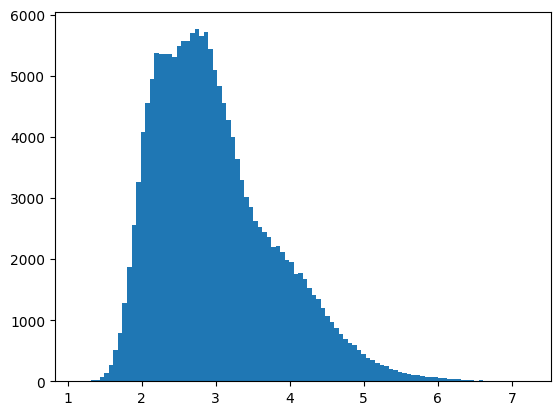

In [52]:
plt.hist(new_df_labeled["SAS"], bins=100)

### analysis for label 1

In [42]:
# filter the data
label = 1
new_matrix = matrix[matrix['label'] == label]
new_df_labeled = df_labeled[df_labeled['label'] == label]
new_matrix.shape, new_df_labeled.shape

((51915, 45), (51915, 5))

(array([1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 1.000e+01, 2.000e+00, 1.300e+01, 1.900e+01,
        1.600e+01, 1.800e+01, 2.000e+01, 3.200e+01, 3.500e+01, 3.900e+01,
        5.500e+01, 6.200e+01, 6.700e+01, 6.700e+01, 8.400e+01, 8.700e+01,
        8.800e+01, 1.280e+02, 1.660e+02, 2.080e+02, 2.290e+02, 2.530e+02,
        2.170e+02, 2.630e+02, 2.440e+02, 2.720e+02, 2.460e+02, 2.400e+02,
        2.860e+02, 3.490e+02, 3.680e+02, 4.690e+02, 5.640e+02, 6.490e+02,
        6.830e+02, 7.500e+02, 7.660e+02, 7.130e+02, 8.040e+02, 8.430e+02,
        7.900e+02, 7.620e+02, 7.800e+02, 8.340e+02, 9.450e+02, 1.011e+03,
        1.176e+03, 1.311e+03, 1.496e+03, 1.613e+03, 1.790e+03, 1.956e+03,
        2.177e+03, 2.223e+03, 2.120e+03, 2.358e+03, 2.334e+03, 2.540e+03,
        2.525e+03, 2.694e+03, 2.479e+03, 2.588e+03, 2.725e+03, 2.989e+03,
        3.303e+03, 3.371e+03, 3.572e+03, 3.925e+03, 4.178e+03, 4.296e+03,
        4.507e+03, 5.017e+03, 5.394e+0

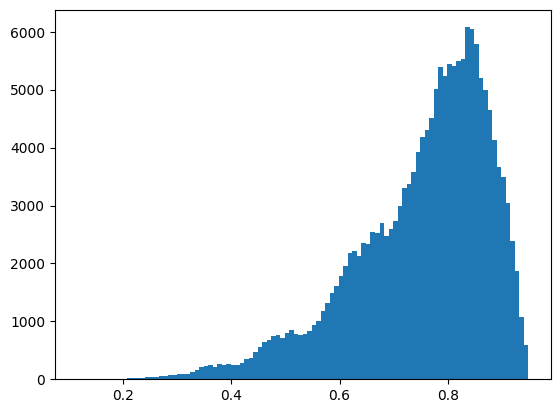

In [53]:
plt.hist(new_df_labeled["qed"], bins=100)

(array([1.000e+00, 2.000e+00, 3.000e+00, 1.300e+01, 2.600e+01, 6.900e+01,
        1.420e+02, 2.720e+02, 5.150e+02, 7.830e+02, 1.280e+03, 1.869e+03,
        2.552e+03, 3.257e+03, 4.081e+03, 4.560e+03, 4.948e+03, 5.373e+03,
        5.348e+03, 5.353e+03, 5.353e+03, 5.312e+03, 5.482e+03, 5.563e+03,
        5.576e+03, 5.701e+03, 5.760e+03, 5.654e+03, 5.723e+03, 5.433e+03,
        5.091e+03, 4.829e+03, 4.548e+03, 4.277e+03, 3.998e+03, 3.644e+03,
        3.301e+03, 3.023e+03, 2.855e+03, 2.627e+03, 2.523e+03, 2.437e+03,
        2.358e+03, 2.196e+03, 2.207e+03, 2.111e+03, 1.981e+03, 1.949e+03,
        1.754e+03, 1.769e+03, 1.667e+03, 1.519e+03, 1.408e+03, 1.344e+03,
        1.193e+03, 1.064e+03, 9.670e+02, 8.710e+02, 7.760e+02, 6.940e+02,
        6.270e+02, 5.920e+02, 5.190e+02, 4.440e+02, 3.860e+02, 3.480e+02,
        3.020e+02, 2.670e+02, 2.460e+02, 1.940e+02, 1.860e+02, 1.560e+02,
        1.380e+02, 1.140e+02, 9.500e+01, 1.070e+02, 8.700e+01, 6.900e+01,
        7.200e+01, 7.500e+01, 5.300e+0

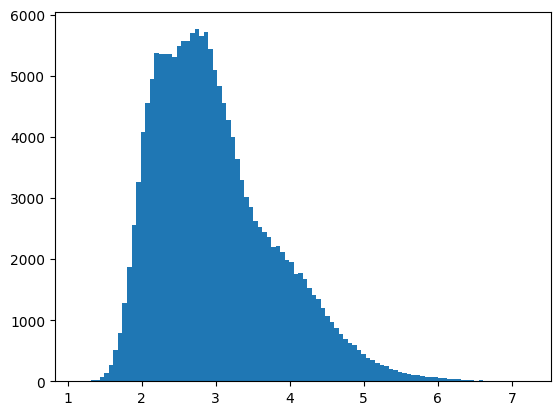

In [54]:
plt.hist(new_df_labeled["SAS"], bins=100)

### Analysis for label 2

In [45]:
# filter the data
label = 2
new_matrix = matrix[matrix['label'] == label]
new_df_labeled = df_labeled[df_labeled['label'] == label]
new_matrix.shape, new_df_labeled.shape

((14717, 45), (14717, 5))

(array([1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 1.000e+01, 2.000e+00, 1.300e+01, 1.900e+01,
        1.600e+01, 1.800e+01, 2.000e+01, 3.200e+01, 3.500e+01, 3.900e+01,
        5.500e+01, 6.200e+01, 6.700e+01, 6.700e+01, 8.400e+01, 8.700e+01,
        8.800e+01, 1.280e+02, 1.660e+02, 2.080e+02, 2.290e+02, 2.530e+02,
        2.170e+02, 2.630e+02, 2.440e+02, 2.720e+02, 2.460e+02, 2.400e+02,
        2.860e+02, 3.490e+02, 3.680e+02, 4.690e+02, 5.640e+02, 6.490e+02,
        6.830e+02, 7.500e+02, 7.660e+02, 7.130e+02, 8.040e+02, 8.430e+02,
        7.900e+02, 7.620e+02, 7.800e+02, 8.340e+02, 9.450e+02, 1.011e+03,
        1.176e+03, 1.311e+03, 1.496e+03, 1.613e+03, 1.790e+03, 1.956e+03,
        2.177e+03, 2.223e+03, 2.120e+03, 2.358e+03, 2.334e+03, 2.540e+03,
        2.525e+03, 2.694e+03, 2.479e+03, 2.588e+03, 2.725e+03, 2.989e+03,
        3.303e+03, 3.371e+03, 3.572e+03, 3.925e+03, 4.178e+03, 4.296e+03,
        4.507e+03, 5.017e+03, 5.394e+0

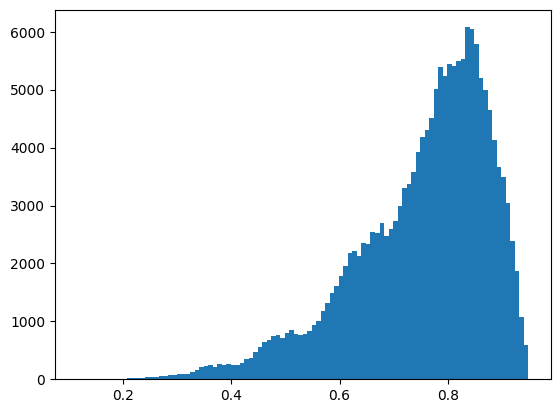

In [55]:
plt.hist(new_df_labeled["qed"], bins=100)

(array([1.000e+00, 2.000e+00, 3.000e+00, 1.300e+01, 2.600e+01, 6.900e+01,
        1.420e+02, 2.720e+02, 5.150e+02, 7.830e+02, 1.280e+03, 1.869e+03,
        2.552e+03, 3.257e+03, 4.081e+03, 4.560e+03, 4.948e+03, 5.373e+03,
        5.348e+03, 5.353e+03, 5.353e+03, 5.312e+03, 5.482e+03, 5.563e+03,
        5.576e+03, 5.701e+03, 5.760e+03, 5.654e+03, 5.723e+03, 5.433e+03,
        5.091e+03, 4.829e+03, 4.548e+03, 4.277e+03, 3.998e+03, 3.644e+03,
        3.301e+03, 3.023e+03, 2.855e+03, 2.627e+03, 2.523e+03, 2.437e+03,
        2.358e+03, 2.196e+03, 2.207e+03, 2.111e+03, 1.981e+03, 1.949e+03,
        1.754e+03, 1.769e+03, 1.667e+03, 1.519e+03, 1.408e+03, 1.344e+03,
        1.193e+03, 1.064e+03, 9.670e+02, 8.710e+02, 7.760e+02, 6.940e+02,
        6.270e+02, 5.920e+02, 5.190e+02, 4.440e+02, 3.860e+02, 3.480e+02,
        3.020e+02, 2.670e+02, 2.460e+02, 1.940e+02, 1.860e+02, 1.560e+02,
        1.380e+02, 1.140e+02, 9.500e+01, 1.070e+02, 8.700e+01, 6.900e+01,
        7.200e+01, 7.500e+01, 5.300e+0

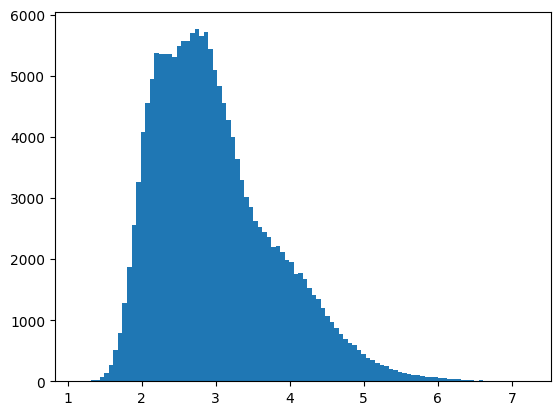

In [56]:
plt.hist(new_df_labeled["SAS"], bins=100)

# analysis for label 3

In [48]:
# filter the data
label = 3
new_matrix = matrix[matrix['label'] == label]
new_df_labeled = df_labeled[df_labeled['label'] == label]
new_matrix.shape, new_df_labeled.shape

((172360, 45), (172360, 5))

(array([1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 1.000e+01, 2.000e+00, 1.300e+01, 1.900e+01,
        1.600e+01, 1.800e+01, 2.000e+01, 3.200e+01, 3.500e+01, 3.900e+01,
        5.500e+01, 6.200e+01, 6.700e+01, 6.700e+01, 8.400e+01, 8.700e+01,
        8.800e+01, 1.280e+02, 1.660e+02, 2.080e+02, 2.290e+02, 2.530e+02,
        2.170e+02, 2.630e+02, 2.440e+02, 2.720e+02, 2.460e+02, 2.400e+02,
        2.860e+02, 3.490e+02, 3.680e+02, 4.690e+02, 5.640e+02, 6.490e+02,
        6.830e+02, 7.500e+02, 7.660e+02, 7.130e+02, 8.040e+02, 8.430e+02,
        7.900e+02, 7.620e+02, 7.800e+02, 8.340e+02, 9.450e+02, 1.011e+03,
        1.176e+03, 1.311e+03, 1.496e+03, 1.613e+03, 1.790e+03, 1.956e+03,
        2.177e+03, 2.223e+03, 2.120e+03, 2.358e+03, 2.334e+03, 2.540e+03,
        2.525e+03, 2.694e+03, 2.479e+03, 2.588e+03, 2.725e+03, 2.989e+03,
        3.303e+03, 3.371e+03, 3.572e+03, 3.925e+03, 4.178e+03, 4.296e+03,
        4.507e+03, 5.017e+03, 5.394e+0

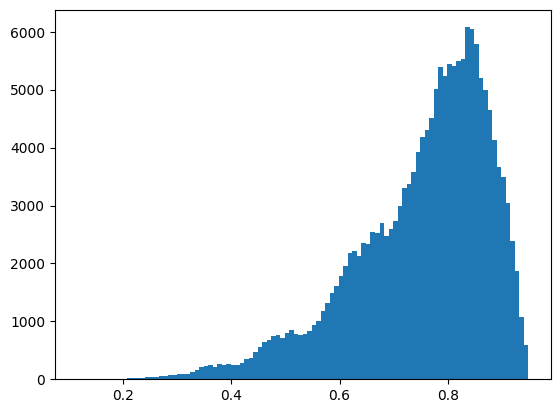

In [57]:
plt.hist(new_df_labeled["qed"], bins=100)

(array([1.000e+00, 2.000e+00, 3.000e+00, 1.300e+01, 2.600e+01, 6.900e+01,
        1.420e+02, 2.720e+02, 5.150e+02, 7.830e+02, 1.280e+03, 1.869e+03,
        2.552e+03, 3.257e+03, 4.081e+03, 4.560e+03, 4.948e+03, 5.373e+03,
        5.348e+03, 5.353e+03, 5.353e+03, 5.312e+03, 5.482e+03, 5.563e+03,
        5.576e+03, 5.701e+03, 5.760e+03, 5.654e+03, 5.723e+03, 5.433e+03,
        5.091e+03, 4.829e+03, 4.548e+03, 4.277e+03, 3.998e+03, 3.644e+03,
        3.301e+03, 3.023e+03, 2.855e+03, 2.627e+03, 2.523e+03, 2.437e+03,
        2.358e+03, 2.196e+03, 2.207e+03, 2.111e+03, 1.981e+03, 1.949e+03,
        1.754e+03, 1.769e+03, 1.667e+03, 1.519e+03, 1.408e+03, 1.344e+03,
        1.193e+03, 1.064e+03, 9.670e+02, 8.710e+02, 7.760e+02, 6.940e+02,
        6.270e+02, 5.920e+02, 5.190e+02, 4.440e+02, 3.860e+02, 3.480e+02,
        3.020e+02, 2.670e+02, 2.460e+02, 1.940e+02, 1.860e+02, 1.560e+02,
        1.380e+02, 1.140e+02, 9.500e+01, 1.070e+02, 8.700e+01, 6.900e+01,
        7.200e+01, 7.500e+01, 5.300e+0

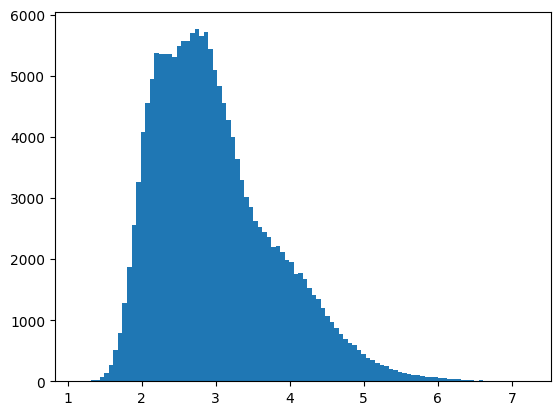

In [58]:
plt.hist(new_df_labeled["SAS"], bins=100)

## Analysis for Experiment 1

In [125]:
import torch
import torch.nn as nn
data = pd.read_csv("data\experiment_1\group_0\matrix_data.csv")
# Define the ANN model for tokenizing with specific input and output sizes using Sequential
class TokenizerANN(nn.Module):
    def __init__(self, input_size, output_size):
        
        super(TokenizerANN, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 512),  # First hidden layer
            nn.ReLU(),
            nn.Linear(512, 256),       # Third hidden layer
            nn.ReLU(),
            nn.Linear(256, 128),       # Fourth hidden layer
            nn.ReLU(),
            nn.Linear(128, 64),        # Fifth hidden layer
            nn.ReLU(),
            nn.Linear(64, output_size) ,
            nn.Softmax()# Encoder output layer
        )
       
        self.decoder = nn.Sequential(
            nn.Linear(output_size, 64),          # Decoder input layer
            nn.ReLU(),
            nn.Linear(64, 128),        # First hidden layer
            nn.ReLU(),
            nn.Linear(128, 256),       # Second hidden layer
            nn.ReLU(),
            nn.Linear(256, 512),       # Third hidden layer
            nn.ReLU(),
            nn.Linear(512, input_size)   # Decoder output layer
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

target_size = 3
device = "cuda"
# Create a new instance of the model
loaded_model = TokenizerANN(input_size = 44,
                     output_size=4).to(device)
# Load the saved state dictionary into the new model instance
loaded_model.load_state_dict(torch.load("tokenizer_ann_with_decoder.pth"))

for i in range(5):
    cc = np.load(f"data\experiment_1\group_{i}\cluster_center.npy")
    decoded_cluster_center = loaded_model.decoder(torch.tensor(cc, dtype=torch.float32).to("cuda")).to("cpu").detach().numpy()
    pd.DataFrame(decoded_cluster_center, columns=data.columns).astype(int).to_csv(f"data/experiment_1/group_{i}/cluster_center.csv", index=False)

### Group 0

In [137]:
cc = pd.read_csv("data\experiment_1\group_0\cluster_center.csv")
# Remove rows with any zero
cc.loc[:, (cc != 0).any(axis=0)]

,Br,C,Cl,F,H,I,N,O,ether,aldehyde2,amines2,esters,aromatic,cycle
0,1,20,1,3,45,3,5,0,0,0,1,0,0,3
1,1,21,2,1,13,1,0,7,3,2,0,1,2,1
2,0,6,1,1,2,0,4,0,0,0,0,0,1,0
3,0,11,0,1,20,1,0,3,1,1,0,0,0,1


### Group 1

In [136]:
cc = pd.read_csv("data\experiment_1\group_1\cluster_center.csv")
# Remove rows with any zero
cc.loc[:, (cc != 0).any(axis=0)]

,Br,C,Cl,F,H,I,N,O,ether,aldehyde2,amines2,esters,aromatic,cycle
0,2,28,1,3,45,3,6,1,0,1,1,0,1,4
1,1,21,1,1,16,1,0,7,3,2,0,1,2,1
2,0,4,0,0,3,0,3,0,0,0,0,0,0,0
3,1,16,1,2,30,2,1,2,1,1,0,0,0,2


### Group 2

In [135]:
cc = pd.read_csv("data\experiment_1\group_2\cluster_center.csv")
# Remove rows with any zero
cc.loc[:, (cc != 0).any(axis=0)]

,Br,C,Cl,F,H,I,N,O,ether,aldehyde2,amines2,esters,aromatic,cycle
0,2,28,1,3,47,3,5,1,0,1,1,0,1,4
1,0,5,1,1,0,0,2,1,0,0,0,0,1,0
2,1,24,1,1,22,1,0,7,3,2,0,1,2,2
3,0,9,0,1,24,1,1,1,0,0,0,0,0,1


### Group 3

In [133]:
cc = pd.read_csv("data\experiment_1\group_3\cluster_center.csv")
# Remove rows with any zero
cc.loc[:, (cc != 0).any(axis=0)]

,Br,C,Cl,F,H,I,N,O,ether,aldehyde2,amines2,esters,aromatic,cycle
0,1,21,1,1,16,1,0,7,3,2,0,1,2,1
1,2,26,1,3,47,3,5,1,0,1,1,0,0,4
2,0,3,0,0,4,0,2,0,0,0,0,0,0,0
3,1,24,2,1,20,1,3,2,0,1,0,0,3,1


### Group 4

In [134]:
cc = pd.read_csv("data\experiment_1\group_4\cluster_center.csv")
# Remove rows with any zero
cc.loc[:, (cc != 0).any(axis=0)]

,Br,C,Cl,F,H,I,N,O,ether,aldehyde2,amines2,esters,aromatic,cycle
0,1,24,1,2,44,3,4,1,0,0,1,0,0,3
1,1,21,1,1,20,1,0,7,3,2,0,1,2,1
2,0,7,0,1,10,1,3,0,0,0,0,0,0,0
3,2,25,1,2,28,2,3,3,1,1,1,0,2,2
